# Project 
## Data import

In [2]:
# importing all required packages at the start of the notebook
import IPython

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'microbiome'

In [1]:
# doesn't work yet, I will update it - Julia
# wget -O 'sample-metadata.tsv' https://polybox.ethz.ch/index.php/s/f4XQxriGrKqBcsm

## Looking at the meta data

In [4]:
meta = pd.read_csv("data/metadata.tsv", sep="\t")
print("First few rows of the metadata: \n", meta.head(), "\n")
print(f"Metadata has {meta.shape[0]} rows and {meta.shape[1]} comlumns.")

First few rows of the metadata: 
            id  host_id  age_months geo_location_name delivery_mode     sex  \
0  SRR8118533  E000823         4.0           Finland       vaginal    male   
1  SRR8118537  E000823         7.0           Finland       vaginal    male   
2  SRR8118564  E001958         4.0           Finland       vaginal  female   
3  SRR8118650  E001958         7.0           Finland       vaginal  female   
4  SRR8118652  E001958        10.0           Finland       vaginal  female   

  diet_weaning diet_milk  treatment_exposure  
0           no        bd               False  
1          yes     mixed               False  
2          yes        bd               False  
3          yes     mixed               False  
4          yes     mixed               False   

Metadata has 357 rows and 9 comlumns.


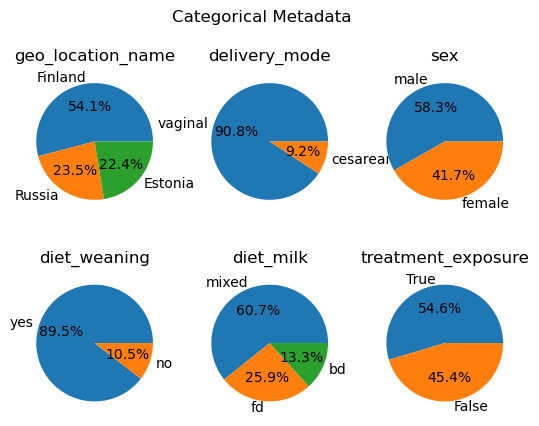

In [6]:
cat_col = ['geo_location_name', 'delivery_mode', 'sex', 'diet_weaning', 'diet_milk', 'treatment_exposure']
fig, axes = plt.subplots(2,3)
axes = axes.flatten()
fig.suptitle('Categorical Metadata')
for i in range(len(cat_col)):
    counts = meta[cat_col[i]].value_counts()
    axes[i].pie(counts, labels= counts.index, autopct='%1.1f%%')
    axes[i].set_title(cat_col[i])

array([[<Axes: title={'center': 'age_months'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

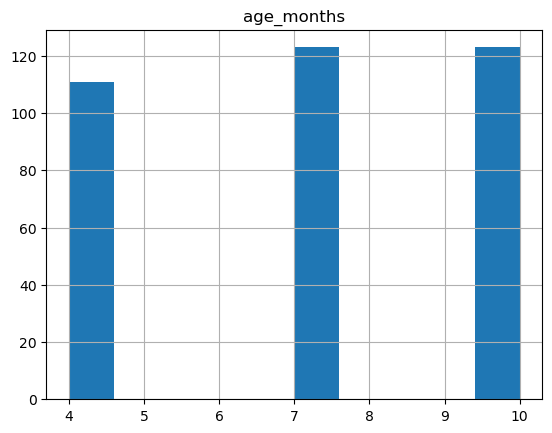

In [7]:
plt.figure()
meta.hist("age_months")

## Looking at the sequence data

In [ ]:
! qiime tools import \
    --type "SampleData[PairedEndSequencesWithQuality]" \
    --input-format SingleEndFastqManifestPhred33V2 \
    --input-path $data_dir/MANIFEST \
    --output-path $data_dir/demux_seqs.qza